# Vector fields

## Noisy saddle

In [6]:
import numpy as np

def Saddle1D(t, u, PARAMETERS = [1, 1]):
    """
    Returns 1D Hamilton-Saddle vector field at time t, for an array of points in phase space.
    Number of model parameters: 1 . PARAMETERS = [lamda]
    Functional form: v = (lamda*y, - lamda*x), with u = (x, y)

    Parameters
    ----------
    t : float
        fixed time-point of vector field, for all points in phase space.

    u : array_like, shape(n,)
        points in phase space to determine vector field at time t.

    PARAMETERS : list of floats
        vector field parameters

    Returns
    -------
    v : array_like, shape(n,)
        vector field corresponding to points u, in phase space at time t
    """
    x, y = u.T
    # Hamiltonian Model Parameter
    a1, a2 = PARAMETERS
    v = np.column_stack([ a1*x, -a2*y])
    return v

## Duffing oscillator

In [7]:
import numpy as np

def Duffing1D(t, u, PARAMETERS = [1, 1, -1]):
    """
    Returns 1D Hamilton-Saddle vector field at time t, for an array of points in phase space.
    Number of model parameters: 1 . PARAMETERS = [lamda]
    Functional form: v = (lamda*y, - lamda*x), with u = (x, y)

    Parameters
    ----------
    t : float
        fixed time-point of vector field, for all points in phase space.

    u : array_like, shape(n,)
        points in phase space to determine vector field at time t.

    PARAMETERS : list of floats
        vector field parameters

    Returns
    -------
    v : array_like, shape(n,)
        vector field corresponding to points u, in phase space at time t
    """
    x, y = u.T
    # Hamiltonian Model Parameter
    alpha, beta, gamma = PARAMETERS
    v = np.column_stack([ alpha*y, beta*x + gamma*x**3])
    return v

## Double gyre

In [8]:
import numpy as np

def DoubleGyre(t, u, PARAMETERS = [0.25, 2*np.pi, 0, 0, 1, 0.25]):
    """
    Returns 1D Double Gyre vector field at time t, for an array of points in phase space.
    Number of model parameters: 1 . PARAMETERS = [lamda]
    Functional form: v = (lamda*y, - lamda*x), with u = (x, y)

    Parameters
    ----------
    t : float
        fixed time-point of vector field, for all points in phase space.

    u : array_like, shape(n,)
        points in phase space to determine vector field at time t.

    PARAMETERS : list of floats
        vector field parameters

    Returns
    -------
    v : array_like, shape(n,)
        vector field corresponding to points u, in phase space at time t
    """
    x, y = u.T
    # model parameter
    A, phi, psi, mu, s, epsilon = PARAMETERS
    # vector field components
    def f(t, x): return epsilon*np.sin(phi*t + psi)*x**2 + (1-2*epsilon*np.sin(phi*t + psi))*x
    def df_dx(t,x): return 2*epsilon*np.sin(phi*t + psi)*x + (1-2*epsilon*np.sin(phi*t + psi))
    v_x = -np.pi*A*np.sin(np.pi*f(t, x)/s)*np.cos(np.pi*y/s) - mu*x
    v_y =  np.pi*A*np.cos(np.pi*f(t, x)/s)*np.sin(np.pi*y/s)*df_dx(t,x) - mu*y
    v   = np.column_stack([ 
        v_x, 
        v_y
    ])
    return v

# SANITY TEST: RK4 integration  (built-in)

In [4]:
from pylds.tools import draw_all_lds
from pylds.base import compute_lagrangian_descriptor

## Noisy saddle

Input parameters

In [5]:
# Integration parameters
tau = 12

# LDp, p-value
p_value = 0.1

# Mesh parameters
x_min,x_max = [-1, 1]
y_min,y_max = [-1, 1]
Nx, Ny = [300, 300]

In [6]:
grid_parameters = [(x_min, x_max, Nx), (y_min, y_max, Ny)]

In [7]:
vector_field = Saddle1D

In [8]:
LD_forward = compute_lagrangian_descriptor(grid_parameters, vector_field, tau, p_value=0.5)
LD_backward = compute_lagrangian_descriptor(grid_parameters, vector_field, -tau, p_value=0.5)

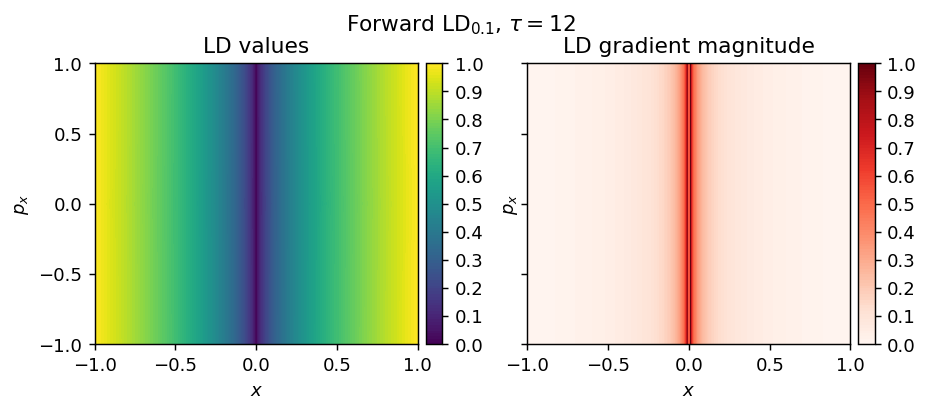

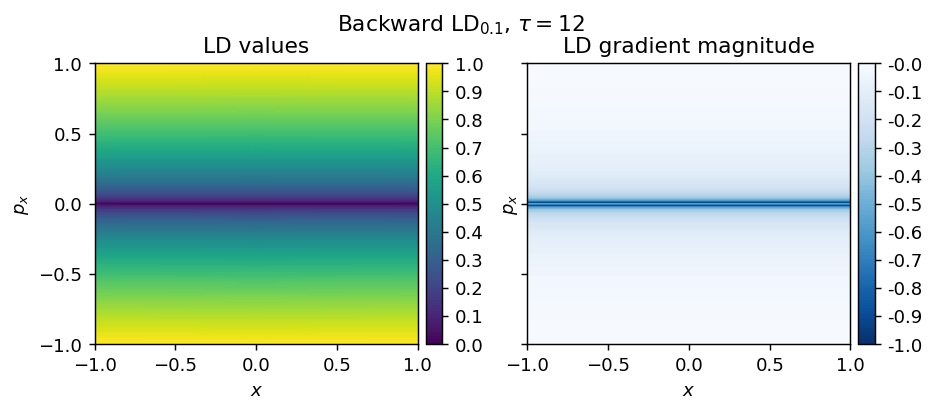

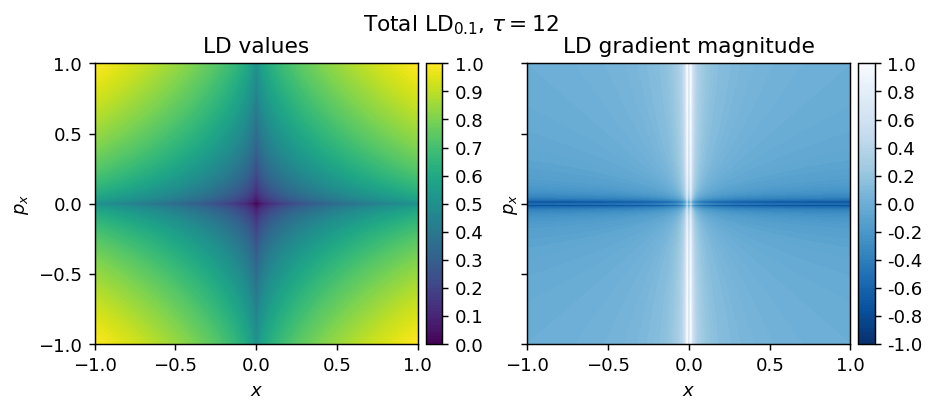

In [9]:
p = draw_all_lds(LD_forward, LD_backward, grid_parameters, tau, p_value)

## Duffing oscillator

Input parameters

In [10]:
# Integration parameters
tau = 15

# LDp, p-value
p_value = 1/2

# Mesh parameters
x_min,x_max = [-1.5, 1.5]
y_min,y_max = [-1, 1]
Nx, Ny = [300, 300]

In [11]:
grid_parameters = [(x_min, x_max, Nx), (y_min, y_max, Ny)]

In [12]:
vector_field = Duffing1D

In [13]:
LD_forward = compute_lagrangian_descriptor(grid_parameters, vector_field, tau, p_value)
LD_backward = compute_lagrangian_descriptor(grid_parameters, vector_field, -tau, p_value)

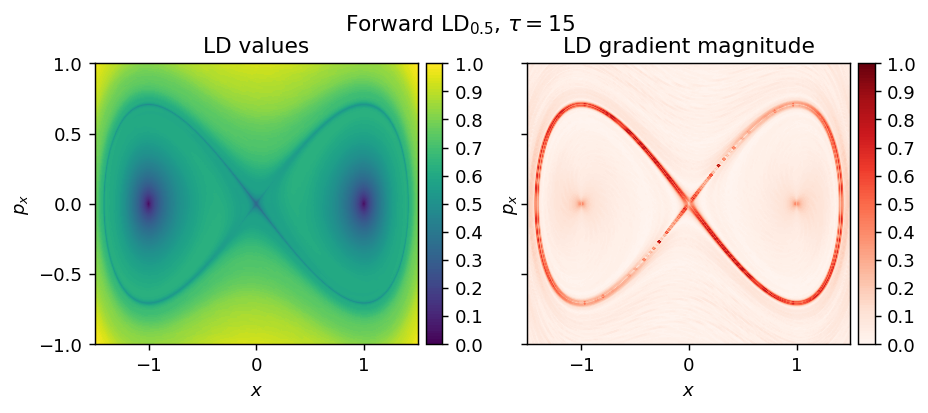

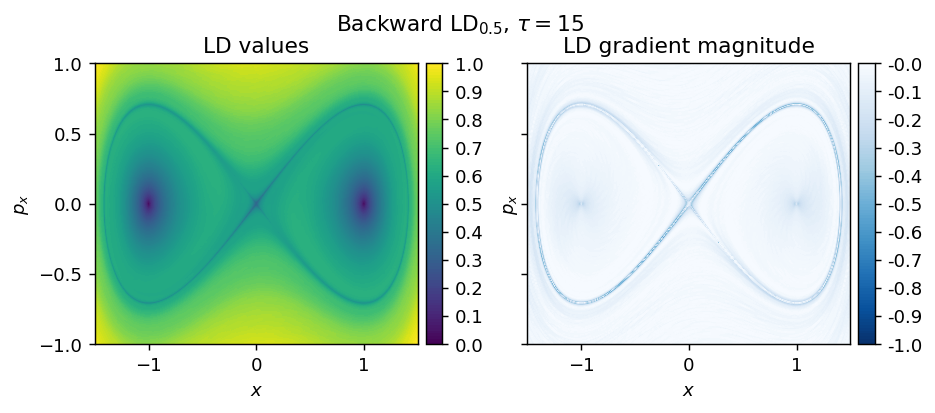

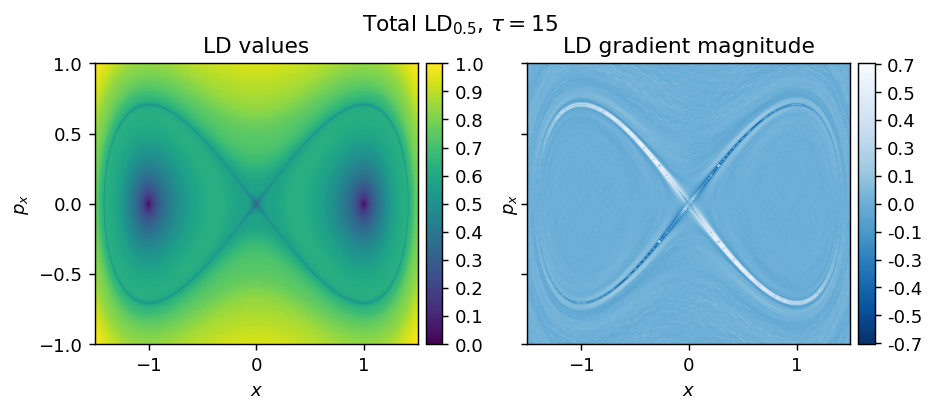

In [14]:
p = draw_all_lds(LD_forward, LD_backward, grid_parameters, tau, p_value)

## Double gyre

Input parameters

In [15]:
# Integration parameters
tau = 15

# LDp, p-value
p_value = 1/2

# Mesh parameters
x_min,x_max = [0, 2]
y_min,y_max = [0, 1]
Nx, Ny = [600, 600]

In [16]:
grid_parameters = [(x_min, x_max, Nx), (y_min, y_max, Ny)]

In [17]:
vector_field = DoubleGyre

In [18]:
LD_forward = compute_lagrangian_descriptor(grid_parameters, vector_field, tau, p_value)
LD_backward = compute_lagrangian_descriptor(grid_parameters, vector_field, -tau, p_value)

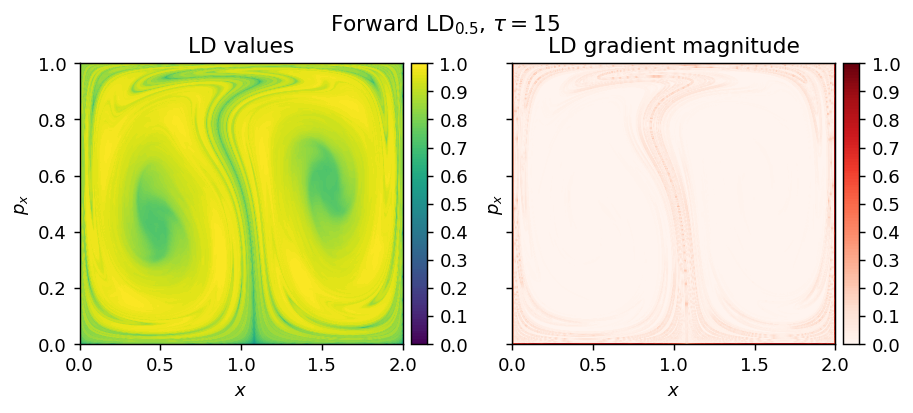

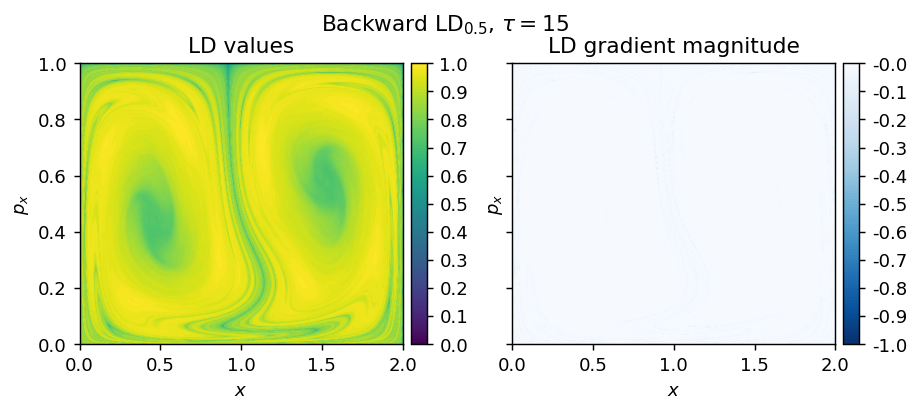

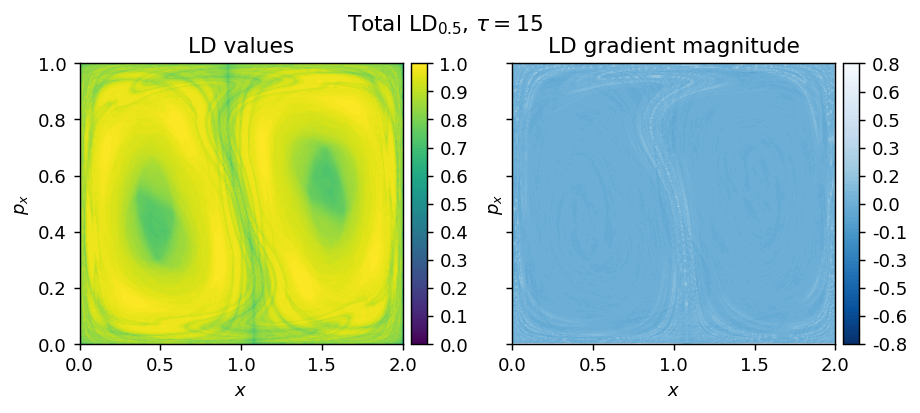

In [19]:
p = draw_all_lds(LD_forward, LD_backward, grid_parameters, tau, p_value)

# Define Euler-Maruyama integrator

In [2]:
import numpy as np
from pylds.tools import draw_all_lds
from pylds.base import generate_points, lagrangian_descriptor

__Euler-Maruyama solver__

ORIGINAL IMPLEMENTATION

In [3]:
def EulerMaruyama_solver(t, u, v, dt, noise_amplitude = [0, 0]):
    """
    Returns vector field for a perturbation at time t, for an array of points in phase space.
    Number of model parameters: 3. perturbation_params = [perturbation_type, amplitude, frequency]
    Functional form: v = (, ), with u = (x, y)

    Parameters
    ----------
    t : float
        fixed time-point of vector field, for all points in phase space.

    u : array_like, shape(n,)
        points in phase space to determine vector field at time t.

    perturbation_params : list of floats, [perturbation_type, amplitude, frequency]
        vector field parameters

    Returns
    -------
    v : array_like, shape(n,)
        vector field corresponding to points u, in phase space at time t
    """
    # iterative solver
    b  = np.array(noise_amplitude) #noise amplitude
    #dW = np.sqrt(abs(dt))*np.random.randn(*u.shape)
    dW = np.sqrt(abs(dt))*np.random.randn(u.shape[1])*np.ones(u.shape)
    u  = u + v(t, u)*dt + b*dW

    return u

LATEST IMPLEMENTATION

In [4]:
def EulerMaruyama_solver(t, u_initial, vector_field, time_step, noise_amplitude=[0, 0], noise_type="additive"):
    """
    Returns vector field for a perturbation at time t, for an array of points in phase space.
    Number of model parameters: 3. perturbation_params = [perturbation_type, amplitude, frequency]
    Functional form: v = (, ), with u = (x, y)

    Parameters
    ----------
    t : float
        fixed time-point of vector field, for all points in phase space.

    u : array_like, shape(n,)
        points in phase space to determine vector field at time t.

    perturbation_params : list of floats, [perturbation_type, amplitude, frequency]
        vector field parameters

    Returns
    -------
    v : array_like, shape(n,)
        vector field corresponding to points u, in phase space at time t
    """
    #solver parameters
    dt = time_step
    v  = vector_field
    b  = np.array(noise_amplitude)
    
    #define Weinner process
    if noise_type == "additive":
        N_dims = u_initial.shape[1] # phase space dim
        dW = np.sqrt(abs(dt))*np.random.randn(N_dims)*np.ones(u_initial.shape)
    elif noise_type == "multiplicative":
        dW = np.sqrt(abs(dt))*np.random.randn(*u_initial.shape)
    else:
        error_mssg = ("ERROR: noise_type uknown. "
                      "Set as 'additive' or 'multiplicative'")
        print(error_mssg)
    
    #Euler-Maruyama iterative solver
    u_next  = u_initial + v(t, u_initial)*dt + b*dW

    return u_next

__LD calculator for time-dependent iterative maps__

In [20]:
def compute_lagrangian_descriptor(grid_parameters, time_step, discrete_map, N_iterations, p_value=0.5):
    """
    Returns the values of the LD function from trajectories from iterated initial conditions in plane by a map.
    
    Parameters
    ----------
    grid_parameters : list of 3-tuples of floats
        input parameters of limits and size of mesh per axis.
    
    discrete_map: function
        map of discrete 2D dynamical system.
        
    tau : float
        Upper limit of integration.
        
    p_value : float, optional
        Exponent in Lagrangian descriptor definition.
        0 is the acton-based LD,
        0 < p_value < 1 is the Lp quasinorm,
        1 <= p_value < 2 is the Lp norm LD,
        2 is the arclength LD.
        The default is 0.5.
    
    box_boundaries : list of 2-tuples, optional
        Box boundaries for escape condition of variable time integration.
        Boundaries are infinite by default.
        
    perodic_boundaries: list of floats
        Lenght values of periodic box axes (2D default).
        PBC are False by default.
    Returns
    -------
    LD : ndarray, shape (Nx, Ny)
        Array of computed Lagrangian descriptor values for all initial conditions.
    """
    N_mesh_axes = len(grid_parameters)+1
    y0, mask = generate_points(grid_parameters)
    y0 = y0.reshape(-1,N_mesh_axes)
    y0 = y0[:,:-1] # exclude LD-axis
    
    dt = time_step
    f = discrete_map

    LD_values = np.zeros(len(y0))
    t0 = 0
    for i in range(N_iterations):
        y  = f(t0, y0)
        dy = y-y0                
        LD_values = LD_values + lagrangian_descriptor(y0, dy, p_value)
#         t0 = t0+i*dt
        t0 = t0+dt
        y0 = y
        

    N_points_slice_axes = [x[-1] for x in grid_parameters] #take number of points
    LD = LD_values.reshape(*N_points_slice_axes) #reshape to 2-D array  

    if p_value<=1:
        return LD
    else:
        return LD**(1/p_value)

# TEST: Euler-Maruyama __without__ noise

## Noisy saddle

Input parameters

In [23]:
# Integration parameters
tau = 15

# LDp, p-value
p_value = 0.5

# Mesh parameters
x_min,x_max = [-1, 1]
y_min,y_max = [-1, 1]
Nx, Ny = [300, 300]

In [24]:
grid_parameters = [(x_min, x_max, Nx), (y_min, y_max, Ny)]

In [25]:
vector_field = Saddle1D

Additional input parameters

In [26]:
dt = 0.05
N_iterations = int(tau/dt)

In [27]:
noise_amplitude = [0, 0]

discrete_map_forward = lambda t, u : EulerMaruyama_solver(t, u, vector_field, dt, noise_amplitude)
discrete_map_backward = lambda t, u : EulerMaruyama_solver(t, u, vector_field, -dt, noise_amplitude)

In [28]:
LD_forward = compute_lagrangian_descriptor(grid_parameters, dt, discrete_map_forward, N_iterations, p_value=0.5)
LD_backward = compute_lagrangian_descriptor(grid_parameters, dt, discrete_map_backward, N_iterations, p_value=0.5)

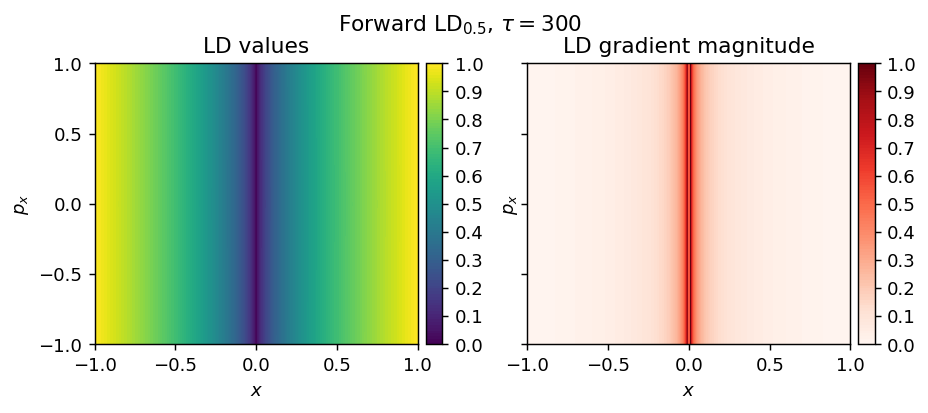

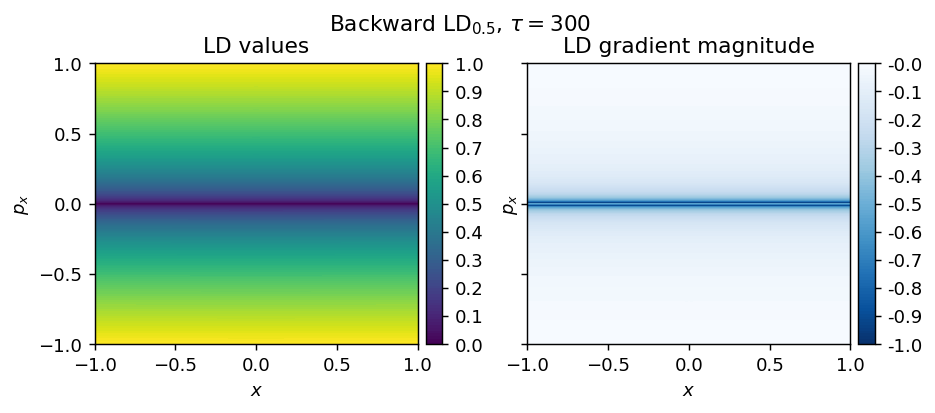

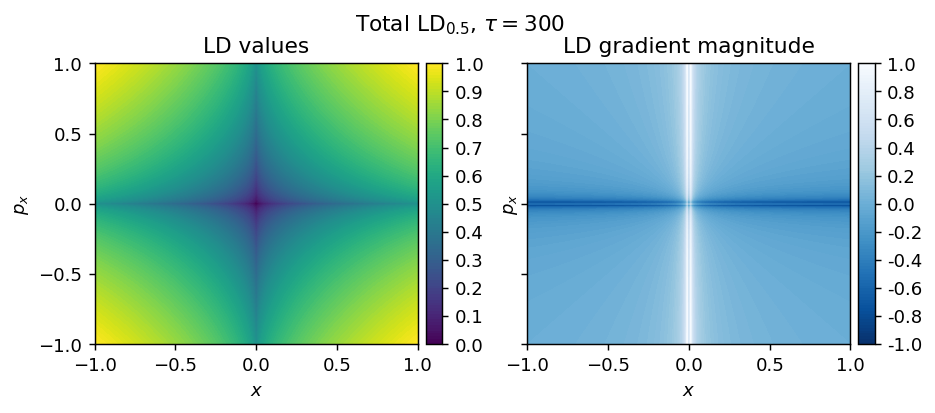

In [29]:
p = draw_all_lds(LD_forward, LD_backward, grid_parameters, N_iterations, p_value)

## Duffing oscillator

Input parameters

In [30]:
# Integration parameters
tau = 15

# LDp, p-value
p_value = 1/2

# Mesh parameters
x_min,x_max = [-1.5, 1.5]
y_min,y_max = [-1, 1]
Nx, Ny = [300, 300]

In [31]:
grid_parameters = [(x_min, x_max, Nx), (y_min, y_max, Ny)]

In [32]:
vector_field = Duffing1D

Additional input parameters

In [33]:
dt = 0.05
N_iterations = int(tau/dt)

In [34]:
noise_amplitude = [0, 0]

discrete_map_forward = lambda t, u : EulerMaruyama_solver(t, u, vector_field, dt, noise_amplitude)
discrete_map_backward = lambda t, u : EulerMaruyama_solver(t, u, vector_field, -dt, noise_amplitude)

In [35]:
LD_forward = compute_lagrangian_descriptor(grid_parameters, dt, discrete_map_forward, N_iterations, p_value)
LD_backward = compute_lagrangian_descriptor(grid_parameters, dt, discrete_map_backward, N_iterations, p_value)

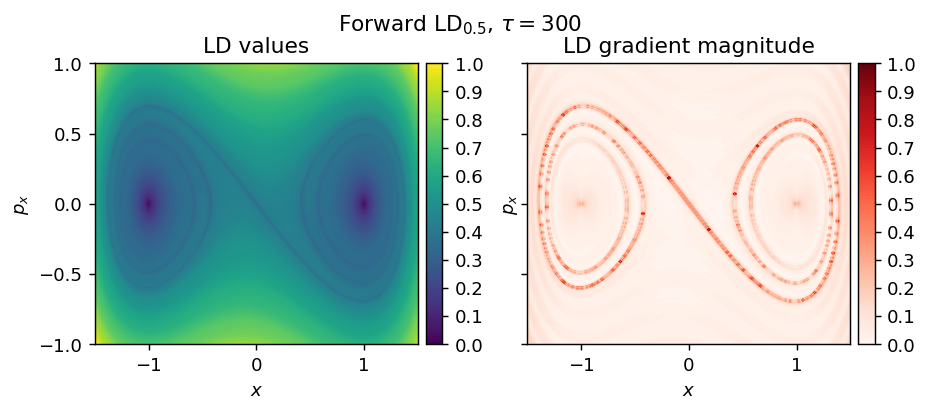

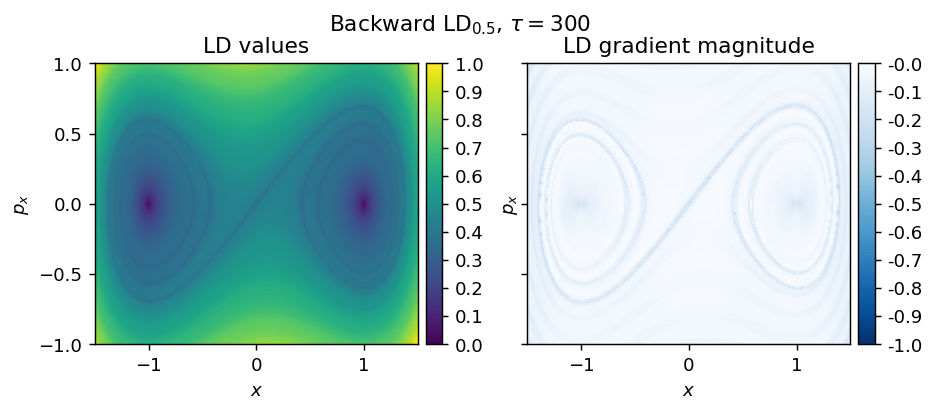

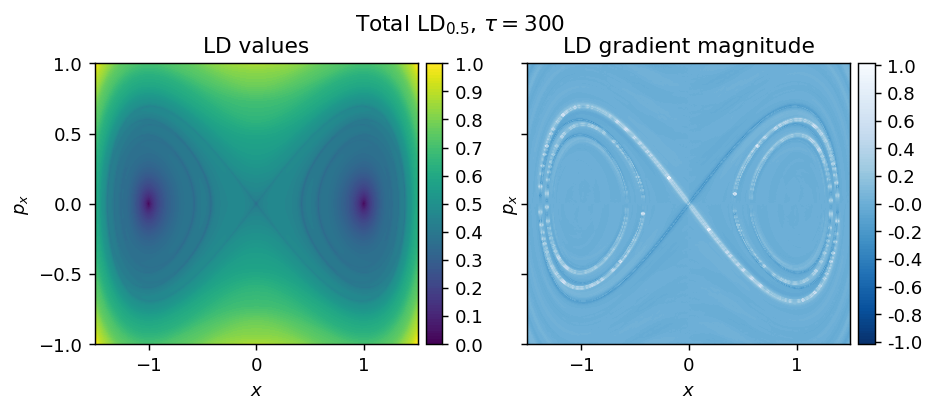

In [36]:
p = draw_all_lds(LD_forward, LD_backward, grid_parameters, N_iterations, p_value)

## Double gyre

Input parameters

In [37]:
# Integration parameters
tau = 15

# LDp, p-value
p_value = 1/2

# Mesh parameters
x_min,x_max = [0, 2]
y_min,y_max = [0, 1]
Nx, Ny = [600, 600]

In [38]:
grid_parameters = [(x_min, x_max, Nx), (y_min, y_max, Ny)]

In [39]:
vector_field = DoubleGyre

Additional input parameters

In [40]:
dt = 0.05
N_iterations = int(tau/dt)

In [41]:
noise_amplitude = [0, 0]

discrete_map_forward = lambda t, u : EulerMaruyama_solver(t, u, vector_field, dt, noise_amplitude)
discrete_map_backward = lambda t, u : EulerMaruyama_solver(t, u, vector_field, -dt, noise_amplitude)

In [42]:
LD_forward = compute_lagrangian_descriptor(grid_parameters, dt, discrete_map_forward, N_iterations, p_value)
LD_backward = compute_lagrangian_descriptor(grid_parameters, dt, discrete_map_backward, N_iterations, p_value)

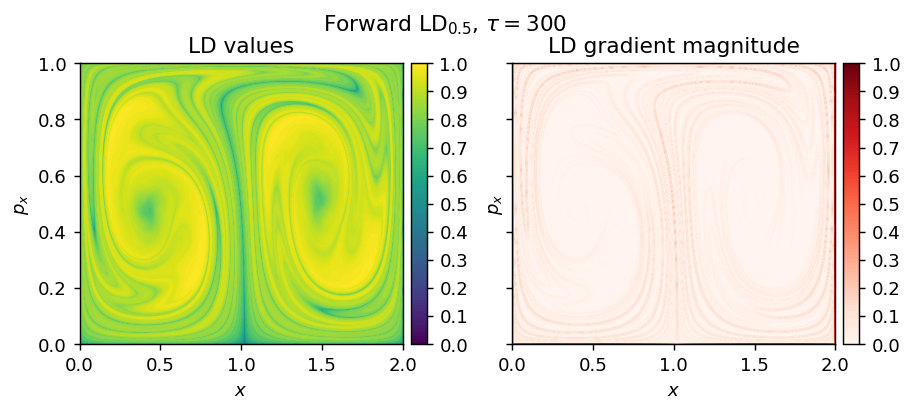

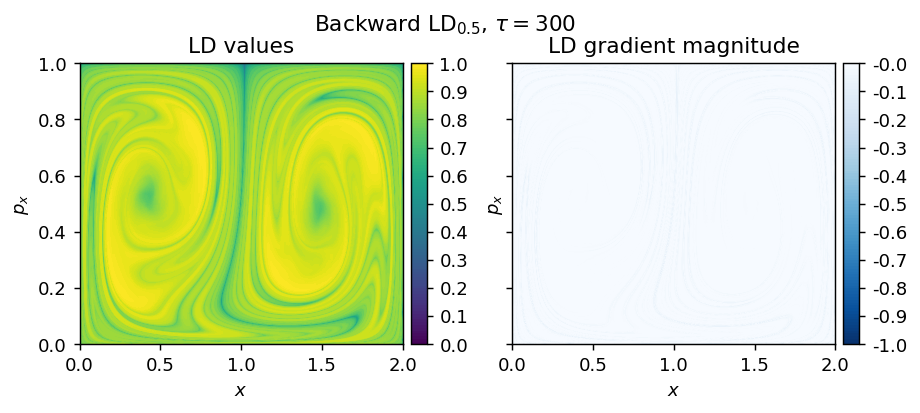

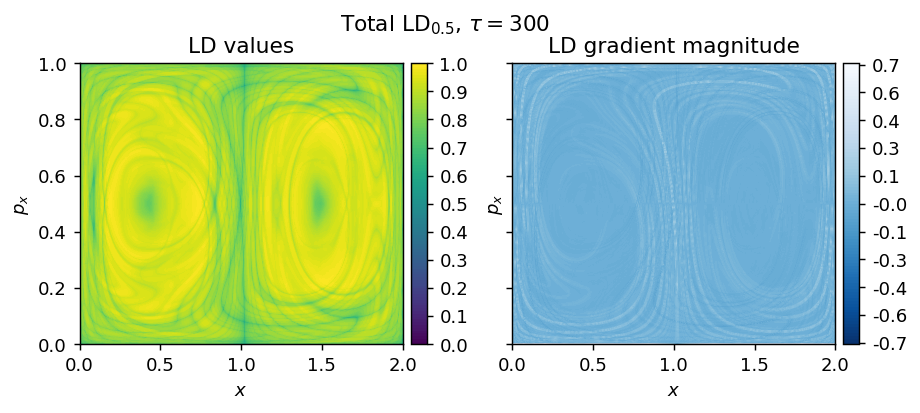

In [43]:
p = draw_all_lds(LD_forward, LD_backward, grid_parameters, N_iterations, p_value)

# TEST: Euler-Maruyama __with__ noise

## Noisy saddle

Input parameters

In [9]:
# Integration parameters
tau = 8

# LDp, p-value
p_value = 0.1

# Mesh parameters
x_min,x_max = [-1, 1]
y_min,y_max = [-1, 1]
Nx, Ny = [300, 300]

In [10]:
grid_parameters = [(x_min, x_max, Nx), (y_min, y_max, Ny)]

In [11]:
vector_field = Saddle1D

Additional input parameters

In [12]:
dt = 0.005
N_iterations = int(tau/dt)

In [16]:
noise_amplitude = [-1, 1]

discrete_map_forward = lambda t, u : EulerMaruyama_solver(t, u, vector_field, dt, noise_amplitude)
discrete_map_backward = lambda t, u : EulerMaruyama_solver(t, u, vector_field, -dt, noise_amplitude)

In [19]:
LD_forward = compute_lagrangian_descriptor(grid_parameters, dt, discrete_map_forward, N_iterations, p_value)
LD_backward = compute_lagrangian_descriptor(grid_parameters, -dt, discrete_map_backward, N_iterations, p_value)

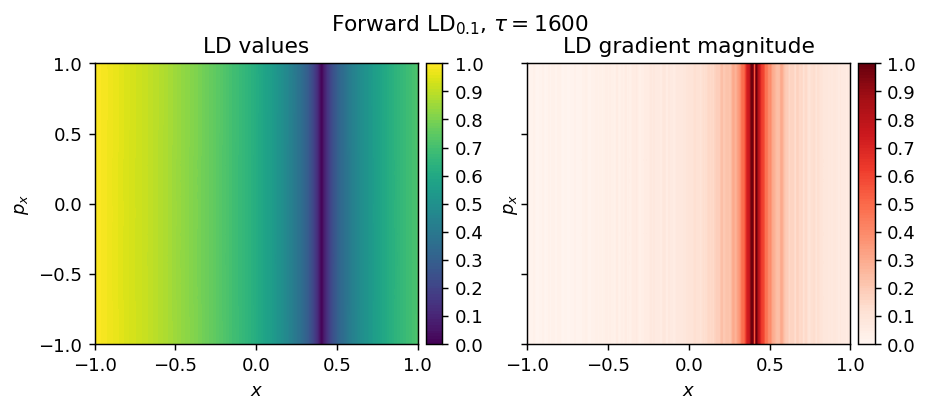

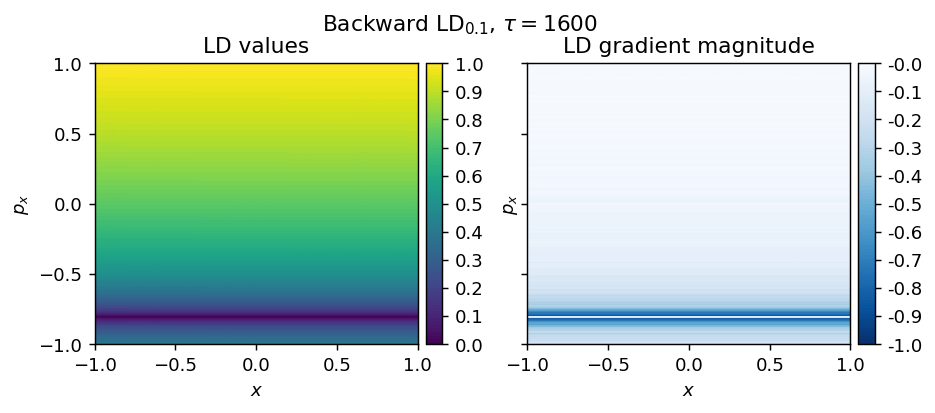

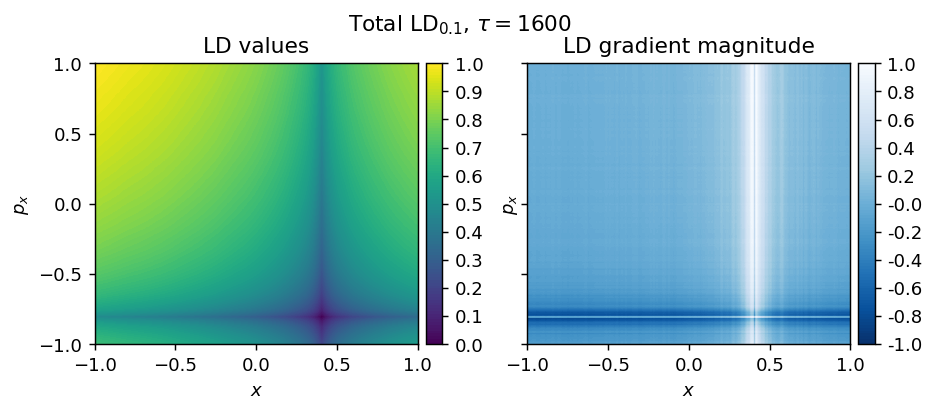

In [18]:
p = draw_all_lds(LD_forward, LD_backward, grid_parameters, N_iterations, p_value)

__Several experiments__

In [21]:
N_trials = 30

In [22]:
LD_total_trials = []

In [23]:
for n in range(N_trials):
    LD_forward = compute_lagrangian_descriptor(grid_parameters, dt, discrete_map_forward, N_iterations, p_value=0.5)
    LD_backward = compute_lagrangian_descriptor(grid_parameters, dt, discrete_map_backward, N_iterations, p_value=0.5)
    LD_total = LD_forward + LD_backward
    
    LD_total_trials.append(LD_total)

In [24]:
LD_total_mean = np.array(LD_total_trials).mean(axis=0)

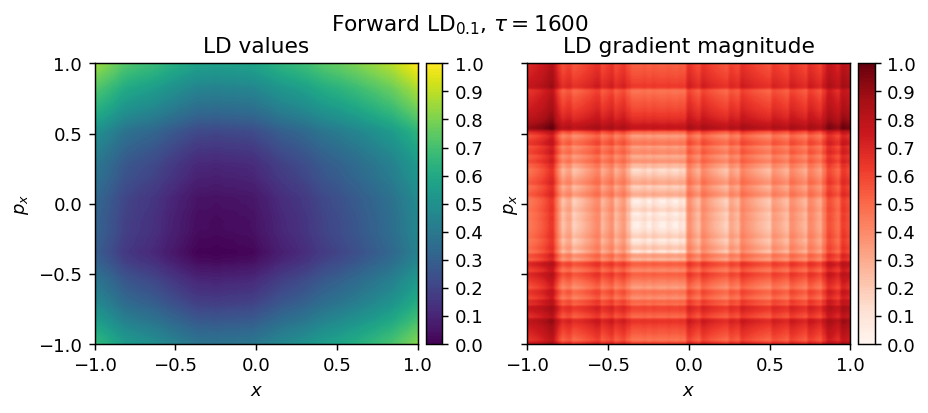

In [25]:
p = draw_all_lds(LD_total_mean, [], grid_parameters, N_iterations, p_value)

## Duffing oscillator

Input parameters

In [26]:
# Integration parameters
tau = 8

# LDp, p-value
p_value = 0.75

# Mesh parameters
x_min,x_max = [-1.5, 1.5]
y_min,y_max = [-1, 1]
Nx, Ny = [500, 500]

In [27]:
grid_parameters = [(x_min, x_max, Nx), (y_min, y_max, Ny)]

In [28]:
vector_field = Duffing1D

Additional input parameters

In [29]:
dt = 0.005
N_iterations = int(tau/dt)

In [30]:
noise_amplitude = [0, 0.25]

discrete_map_forward = lambda t, u : EulerMaruyama_solver(t, u, vector_field, dt, noise_amplitude)
discrete_map_backward = lambda t, u : EulerMaruyama_solver(t, u, vector_field, -dt, noise_amplitude)

In [31]:
LD_forward = compute_lagrangian_descriptor(grid_parameters, dt, discrete_map_forward, N_iterations, p_value)
LD_backward = compute_lagrangian_descriptor(grid_parameters, -dt, discrete_map_backward, N_iterations, p_value)

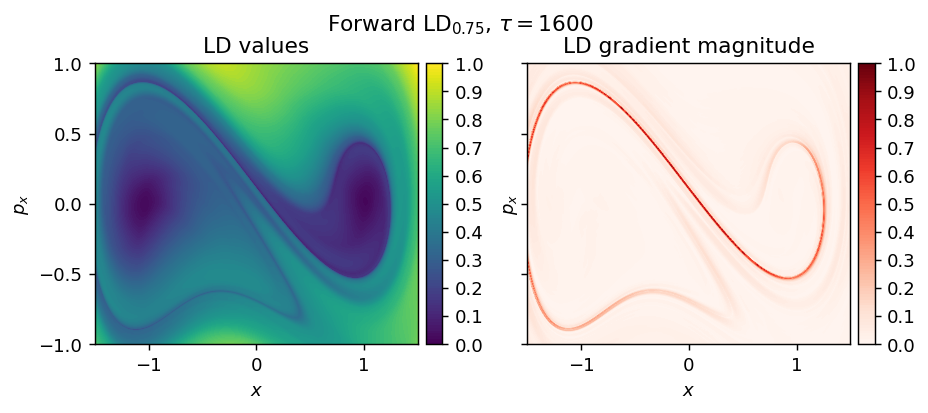

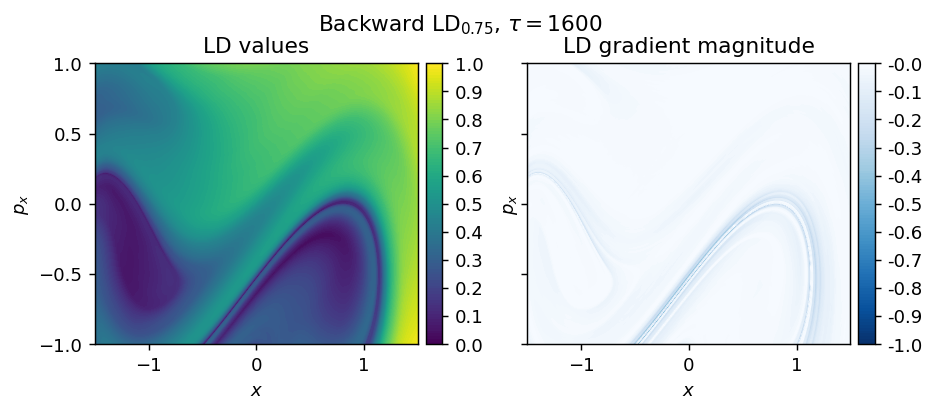

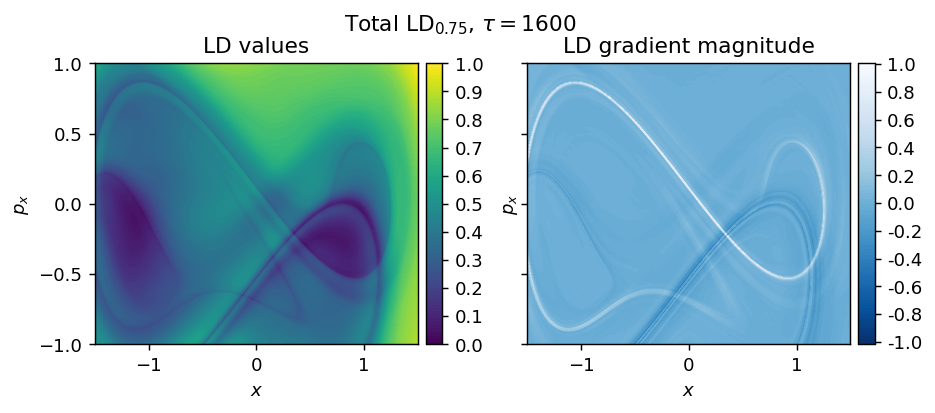

In [32]:
p = draw_all_lds(LD_forward, LD_backward, grid_parameters, N_iterations, p_value)

__Several experiments__

In [33]:
N_trials = 10

In [34]:
LD_total_trials = []

In [35]:
for n in range(N_trials):
    LD_forward = compute_lagrangian_descriptor(grid_parameters, dt, discrete_map_forward, N_iterations, p_value=0.5)
    LD_backward = compute_lagrangian_descriptor(grid_parameters, -dt, discrete_map_backward, N_iterations, p_value=0.5)
    LD_total = LD_forward + LD_backward
    
    LD_total_trials.append(LD_total)

In [36]:
LD_total_mean = np.array(LD_total_trials).mean(axis=0)

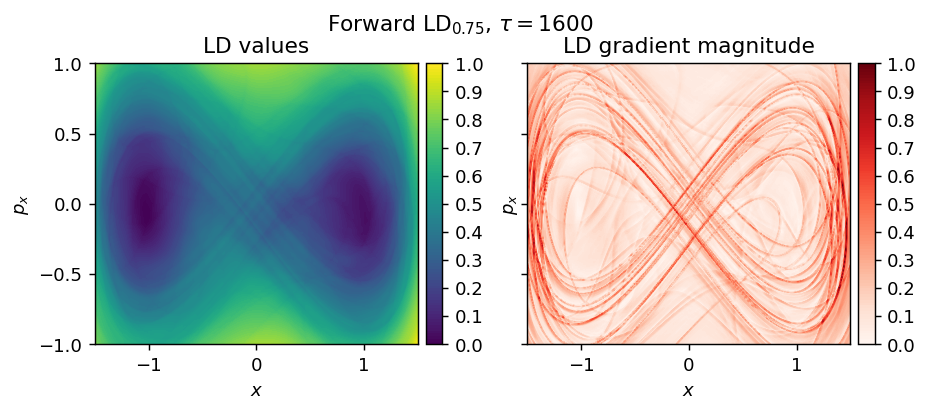

In [37]:
p = draw_all_lds(LD_total_mean, [], grid_parameters, N_iterations, p_value)

## Double gyre

Input parameters

In [38]:
# Integration parameters
tau = 8

# LDp, p-value
p_value = 1/2

# Mesh parameters
x_min,x_max = [0, 2]
y_min,y_max = [0, 1]
Nx, Ny = [500, 500]

In [39]:
grid_parameters = [(x_min, x_max, Nx), (y_min, y_max, Ny)]

In [40]:
vector_field = DoubleGyre

Additional input parameters

In [41]:
dt = 0.005
N_iterations = int(tau/dt)

In [42]:
noise_amplitude = [0.1, 0.1]

discrete_map_forward = lambda t, u : EulerMaruyama_solver(t, u, vector_field, dt, noise_amplitude)
discrete_map_backward = lambda t, u : EulerMaruyama_solver(t, u, vector_field, -dt, noise_amplitude)

In [43]:
LD_forward = compute_lagrangian_descriptor(grid_parameters, dt, discrete_map_forward, N_iterations, p_value)
LD_backward = compute_lagrangian_descriptor(grid_parameters, -dt, discrete_map_backward, N_iterations, p_value)

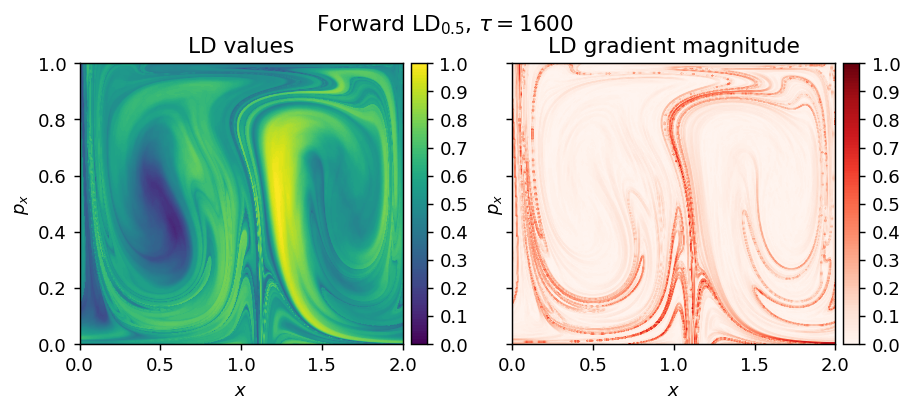

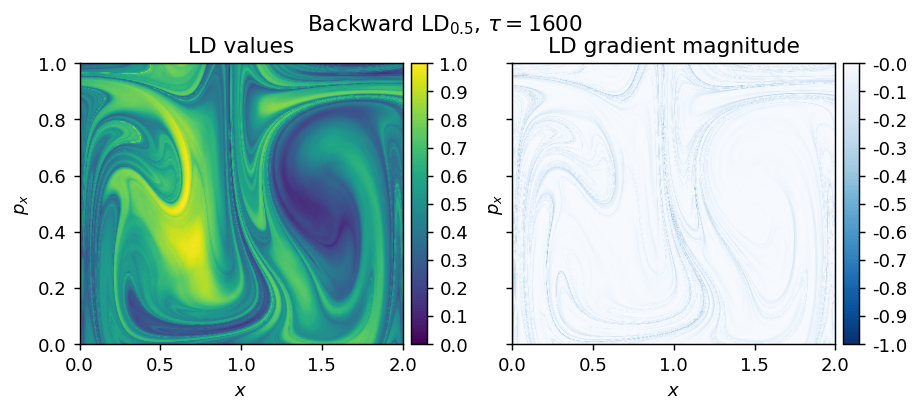

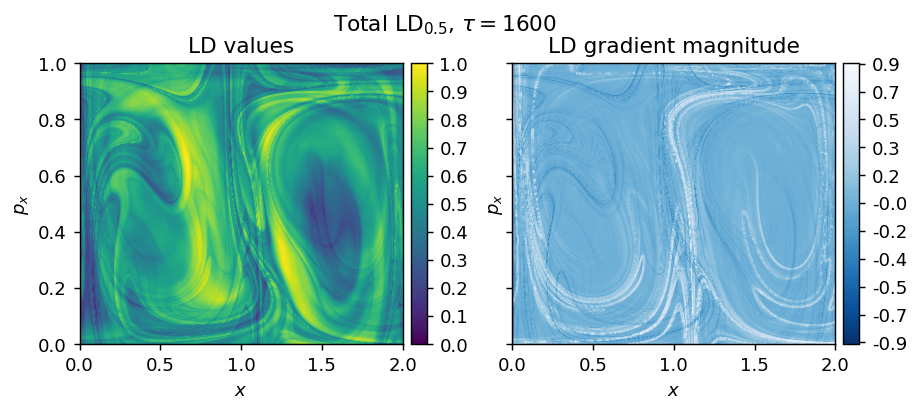

In [44]:
p = draw_all_lds(LD_forward, LD_backward, grid_parameters, N_iterations, p_value)

__Several experiments__

In [45]:
N_trials = 30

In [46]:
LD_total_trials = []

In [47]:
for n in range(N_trials):
    LD_forward = compute_lagrangian_descriptor(grid_parameters, dt, discrete_map_forward, N_iterations, p_value=0.5)
    LD_backward = compute_lagrangian_descriptor(grid_parameters, -dt, discrete_map_backward, N_iterations, p_value=0.5)
    LD_total = LD_forward + LD_backward
    
    LD_total_trials.append(LD_total)

In [48]:
LD_total_mean = np.array(LD_total_trials).mean(axis=0)

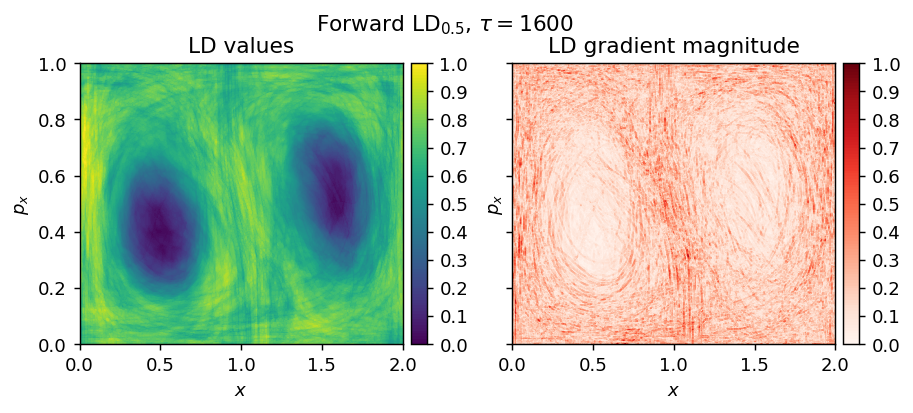

In [49]:
p = draw_all_lds(LD_total_mean, [], grid_parameters, N_iterations, p_value)

# NOTES

* Check function `pruebaSLD.m` to check implementation.
* In `SLD.m` the vairable `dW` is generated as a normalised gaussian with $\mu = 0$ with std $\sqrt{\Delta t /2}$
* Integration is performed with RK4, not Euler-Maruyama (See output from Double Gyre. EM doesn't reproduce the correct LD output when noise amplitude is null)
* Check this for a Python implementation https://en.wikipedia.org/wiki/Milstein_method 
* __Why is the noise amplitude making the integrator crash?__

# Appendix

## Test: different plotting functions

In [80]:
from pylab import *

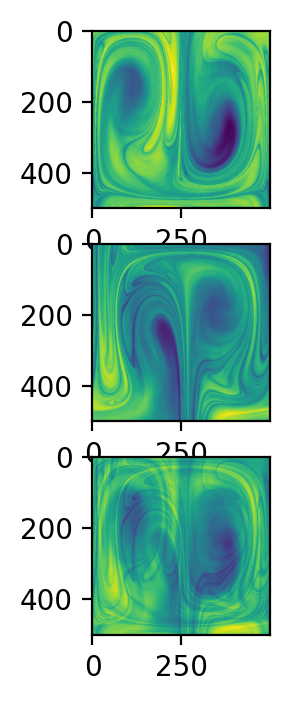

In [81]:
fig,ax = plt.subplots(3,1,dpi=200)
ax[0].imshow(LD_forward)
ax[1].imshow(LD_backward)
ax[2].imshow(LD_forward + LD_backward)
plt.show()

# Useful sources

* https://thomas-cokelaer.info/blog/2014/05/matplotlib-difference-between-pcolor-pcolormesh-and-imshow/

* https://en.wikipedia.org/wiki/Milstein_method an improvement of Euler-Maruyama

* https://ipython-books.github.io/134-simulating-a-stochastic-differential-equation/ Python implementation of Euler-Maruyama